# **Importing Required Libraries and Data**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv')
meal = pd.read_csv('meal_info.csv')
center = pd.read_csv('fulfilment_center_info.csv')
train = train.merge(center,left_on = 'center_id', right_on = 'center_id', how="left")
train = train.merge(meal,left_on = 'meal_id', right_on = 'meal_id', how="left")


In [ ]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [ ]:
train = train.drop(['id'], axis=1)

In [ ]:
train['num_orders'] = train['num_orders'].astype('int')
train['base_price'] = train['base_price'].astype('int')
train['checkout_price'] = train['checkout_price'].astype('int')

In [ ]:
train.describe()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,74.768771,82.105796,2024.337458,331.880131,353.792874,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,41.524956,45.975046,547.420920,152.955354,160.742406,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000,10.000000,1062.000000,2.000000,55.000000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,39.000000,43.000000,1558.000000,228.000000,243.000000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,76.000000,76.000000,1993.000000,296.000000,310.000000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,111.000000,110.000000,2539.000000,445.000000,458.000000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,145.000000,186.000000,2956.000000,866.000000,866.000000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


# **Exploratory Data Analysis**

In [ ]:
df = pd.read_csv('train.csv')

# Display first 5 rows of the dataset
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


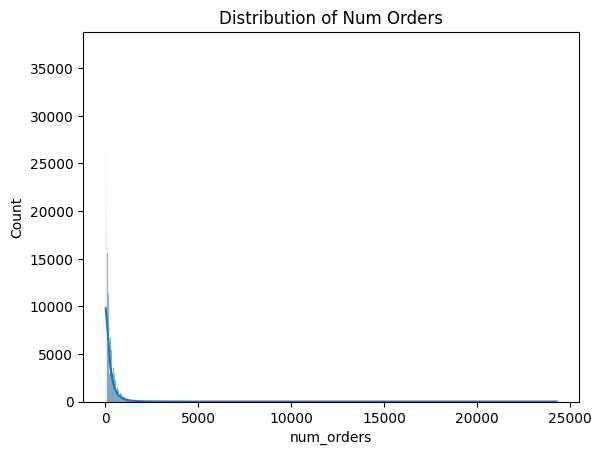

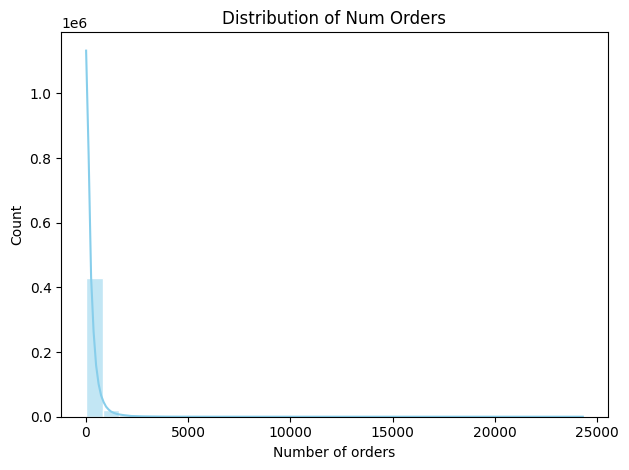

In [ ]:
# Count of unique values in each categorical column
df.select_dtypes('object').nunique()

# Distribution of target variable
sns.histplot(df['num_orders'], kde=True)
plt.title('Distribution of Num Orders')
plt.show()

# Distribution of target variable
sns.histplot(df['num_orders'], bins=30, kde=True, color='skyblue', edgecolor='white')
plt.xlabel('Number of orders')
plt.ylabel('Count')
plt.title('Distribution of Num Orders')
plt.tight_layout()
plt.show()


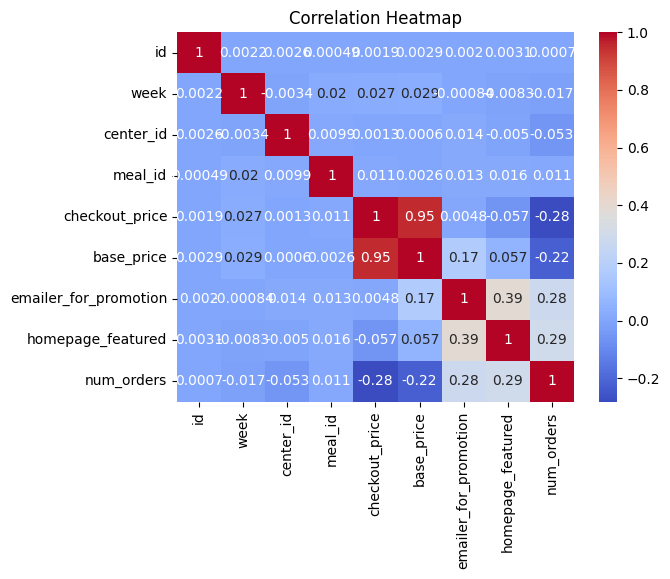

In [ ]:
# Correlation heatmap of numerical columns
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

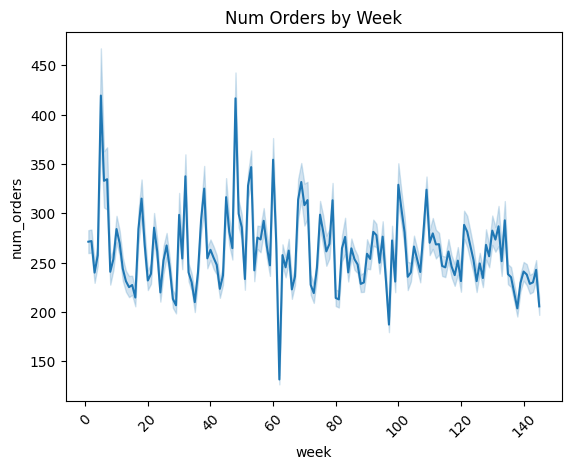

In [ ]:
# Line plot of num_orders by week
sns.lineplot(x='week', y='num_orders', data=df)
plt.xticks(rotation=45)
plt.title('Num Orders by Week')
plt.show()

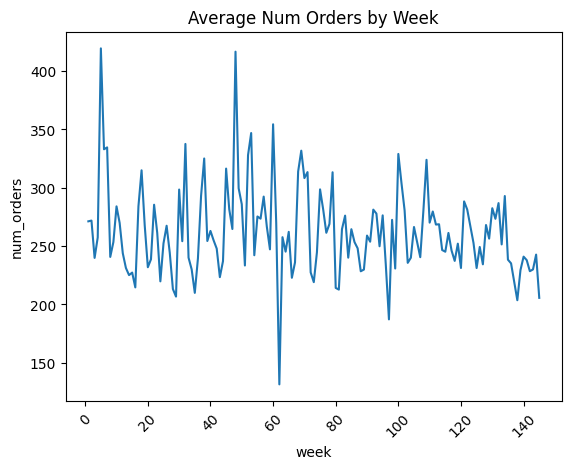

In [ ]:
# Line plot of average number of orders by week
orders_by_week = df.groupby('week')['num_orders'].mean().reset_index()
sns.lineplot(x='week', y='num_orders', data=orders_by_week)
plt.xticks(rotation=45)
plt.title('Average Num Orders by Week')
plt.show()


#**Correlation Analysis**

<ipython-input-14-a1f2d7f734f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train.corr()


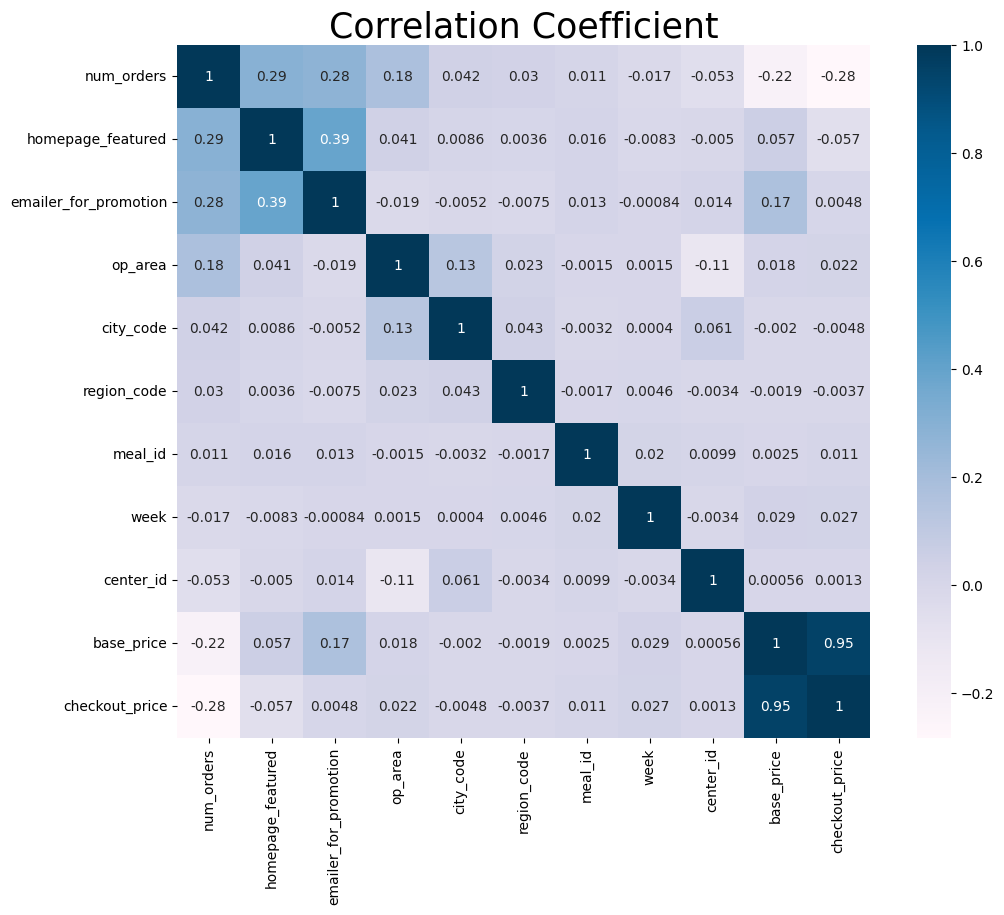

In [ ]:
correlation_matrix = train.corr()
correlation_matrix['num_orders'].sort_values(ascending = False)
corr_num = 14
corr_col = correlation_matrix.nlargest(corr_num,'num_orders')['num_orders'].index

corr_sales = np.corrcoef(train[corr_col].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_sales,annot=True,cmap='PuBu',yticklabels=corr_col.values, xticklabels=corr_col.values,square=True)
plt.title('Correlation Coefficient',fontsize=25)
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:
def one_hot_encode(features_to_encode, dataset):
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(dataset[features_to_encode])

    encoded_cols = pd.DataFrame(encoder.transform(dataset[features_to_encode]), columns=encoder.get_feature_names_out(features_to_encode))
    dataset = dataset.drop(columns=features_to_encode)
    for cols in encoded_cols.columns:
        dataset[cols] = encoded_cols[cols]
    return dataset

In [ ]:
features_to_encode = ['meal_id','city_code',"center_id",'center_type', 'category', 'cuisine']
train = one_hot_encode(features_to_encode, train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
<ipython-input-23-09a981ff8cac>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[cols] = encoded_cols[cols]
<ipython-input-23-09a981ff8cac>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset[cols] = encoded_cols[cols]
<ipython-input-23-09a981ff8cac>:

#**Preparing the Data for Modeling**

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Split into features and target variable
X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']
X_test = test

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**Training and Evaluating ARIMA Model**

In [ ]:
# Train ARIMA model on training set
arima_model = ARIMA(y_train, order=(5,1,0)).fit()

In [ ]:
# Use ARIMA model to predict num_orders for train.csv data
train_pred = arima_model.fittedvalues


In [ ]:
# Compute evaluation metrics for ARIMA predictions on train dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import math

train_pred[train_pred < 0] = 0  # Set negative predicted values to zero
train_pred[train_pred == 0] = 1e-10  # Set zero predicted values to a small positive value


#**ARIMA Model Results**


In [ ]:
mae = mean_absolute_error(train['num_orders'], train_pred)
rmse = math.sqrt(mean_squared_error(train['num_orders'], train_pred))
mape = mean_absolute_percentage_error(train['num_orders'], train_pred)
r_squared = r2_score(train['num_orders'], train_pred)
rmlse = math.sqrt(mean_squared_error(np.log(train['num_orders']), np.log(train_pred)))

print("MAE: ", mae)
print("RMSE: ", rmse)
print("MAPE: ", mape)
print("R^2: ", r_squared)
print("RMSLE: ", rmlse)

MAE:  206.33317001578394
RMSE:  390.5480177399965
MAPE:  2.4885118802560195
R^2:  0.02696422601421644
RMSLE:  1.28124382203196


In [ ]:
# Set up Pycaret experiment
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 98.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.regression import *

#**PyCaret Modeling**

In [ ]:
# Set up Pycaret experiment
reg_experiment = setup(data=train, target='num_orders', session_id=42)



,Description,Value
0,Session id,42
1,Target,num_orders
2,Target type,Regression
3,Original data shape,"(456548, 9)"
4,Transformed data shape,"(456548, 9)"
5,Transformed train set shape,"(319583, 9)"
6,Transformed test set shape,"(136965, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,82.0768,35581.3499,188.5156,0.7747,0.5506,0.5887,112.5600
et,Extra Trees Regressor,86.8875,38030.2849,194.8874,0.7591,0.5778,0.6366,64.6600
lightgbm,Light Gradient Boosting Machine,109.0719,41644.4954,204.0078,0.7360,0.7604,0.9753,1.6900
dt,Decision Tree Regressor,108.9598,65549.9646,255.9612,0.5828,0.7162,0.6889,2.7000
gbr,Gradient Boosting Regressor,138.9631,69679.2941,263.7945,0.5588,0.9047,1.3947,37.9880
lr,Linear Regression,204.2791,126883.8818,356.0353,0.1962,1.2872,2.4352,0.1720
ridge,Ridge Regression,204.2789,126883.8816,356.0353,0.1962,1.2872,2.4352,0.2060
br,Bayesian Ridge,204.2776,126883.8810,356.0353,0.1962,1.2872,2.4353,0.2180
llar,Lasso Least Angle Regression,204.0839,126909.3003,356.0704,0.1960,1.2852,2.4425,0.1140
lasso,Lasso Regression,204.0845,126909.3426,356.0704,0.1960,1.2852,2.4425,0.4980


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

#**Additional PyCaret Modeling**

In [ ]:
train['arima'] = list(arima_model.fittedvalues)
X_train = train.drop(['num_orders'], axis=1)
y_train = train['num_orders']

In [ ]:
# Set up Pycaret experiment
reg_experiment = setup(data=train, target='num_orders', session_id=42)

,Description,Value
0,Session id,42
1,Target,num_orders
2,Target type,Regression
3,Original data shape,"(456548, 10)"
4,Transformed data shape,"(456548, 10)"
5,Transformed train set shape,"(319583, 10)"
6,Transformed test set shape,"(136965, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Compare different regression models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,82.1893,29122.0210,170.4065,0.8155,0.5814,0.6486,113.5010
rf,Random Forest Regressor,82.0250,30211.9074,173.4877,0.8088,0.5751,0.6345,262.4680
xgboost,Extreme Gradient Boosting,90.9485,30512.0447,174.5084,0.8064,0.6904,0.7590,45.0200
lightgbm,Light Gradient Boosting Machine,104.4727,37327.5697,193.0124,0.7632,0.7395,0.9537,2.4020
dt,Decision Tree Regressor,111.0272,58522.4840,241.4530,0.6285,0.7515,0.7440,3.8420
gbr,Gradient Boosting Regressor,133.5078,64897.1400,254.2866,0.5897,0.8950,1.3438,67.0100
lr,Linear Regression,191.3428,116409.5033,340.7452,0.2631,1.1895,2.2210,1.6670
ridge,Ridge Regression,191.3425,116409.5030,340.7452,0.2631,1.1895,2.2210,0.1430
br,Bayesian Ridge,191.3406,116409.5021,340.7452,0.2631,1.1895,2.2210,0.2540
llar,Lasso Least Angle Regression,191.0367,116435.0282,340.7805,0.2629,1.1889,2.2260,0.1640


Processing:   0%|          | 0/81 [00:00<?, ?it/s]